In [1]:
from graph_gen import * 
from visualize_tools import *
from clique_functions import *

import gudhi
import math
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython.display import display, HTML

In [2]:
N = 10
random_graph_matrix = generate_random_graph_matrix(N)
off_diag = get_off_diagonal_entries(random_graph_matrix)

In [3]:
edge_filtration = get_edge_filtration(off_diag)

In [4]:
graph_filtration = generate_graph_filtration(edge_filtration)

In [5]:
g_filtration = gudhi_filtration(graph_filtration, N)

Cliques Computed
Building Clique Complex


100%|█████████████████████████████████████████████████████████████████████████████████| 45/45 [00:00<00:00, 3665.28it/s]


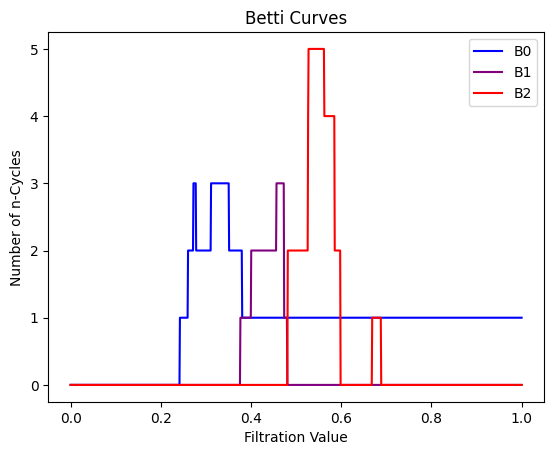

In [6]:
persistence = g_filtration.persistence(homology_coeff_field = 2, persistence_dim_max=True)

x0, b0 = get_betti_curve(persistence, 0)
x1, b1 = get_betti_curve(persistence, 1)
x2, b2 = get_betti_curve(persistence, 2)
x3, b3 = get_betti_curve(persistence, 3)


# Initialize a color map for distinguishing curves
color_map = plt.get_cmap('viridis')

# Create a figure and axis
fig, ax = plt.subplots()

ax.plot(x0, b0, label="B0", color="blue")
ax.plot(x1, b1, label="B1", color="purple")
ax.plot(x2, b2, label="B2", color="red")
# ax.plot(x3, b3, label="B3", color="orange")

# Set labels and legend
ax.set_xlabel('Filtration Value')
ax.set_ylabel('Number of n-Cycles')
ax.set_title('Betti Curves')
ax.legend()

plt.show()

/home/marco/miniconda3/envs/clique/lib/python3.9/site-packages/gudhi/persistence_graphical_tools.py:105: UserWarning: This function is not available.
ModuleNotFoundError: No module named 'matplotlib'.
  warnings.warn(f"This function is not available.\nModuleNotFoundError: No module named '{import_error.name}'.")


<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

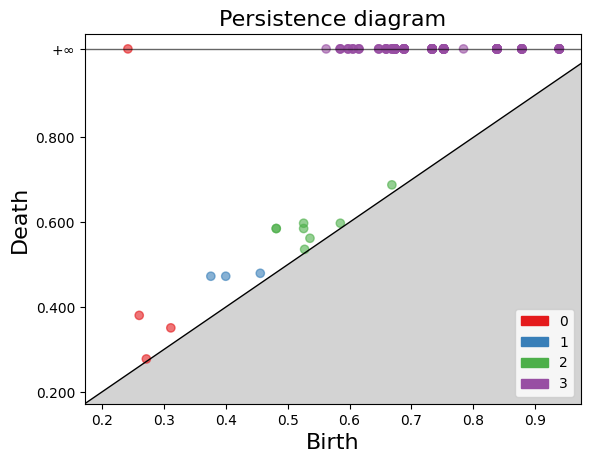

In [8]:
gudhi.plot_persistence_diagram(persistence)